In [70]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import warnings
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings("ignore")
torch.set_printoptions(precision=20, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)


In [71]:
x_train = torch.tensor([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], dtype=torch.float, requires_grad=True)
x_train=x_train.reshape(-1,1)
y_train_DrParand= torch.tensor([[0.000000000000,0.165571725847,0.650024370165,1.396808231342,2.305746419194,3.283273666139,4.279620923737,5.279238812489,6.279213433045]], dtype=torch.float,requires_grad=True)

y_train=y_train_DrParand
y_train=y_train.reshape(-1,1)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=3, shuffle=True,drop_last=True)

In [72]:
class CustomActivationLayer(nn.Module):
    def __init__(self, input_size, output_size,L):
        super(CustomActivationLayer, self).__init__()
        self.L=L

        # Ensure the output size matches the number of custom functions
        assert output_size == 9, "This example requires exactly 3 output nodes."

    def forward(self, x):
        # Get the linear output
        linear_out = x
        L=self.L
        activated_out = torch.stack([
            linear_out[:,0]*0+1.0,
            (linear_out[:,1]-L)/(linear_out[:,1]+L),
            1.5*((linear_out[:,2]-L)/(linear_out[:,2]+L))**2-1.5,
            2.5*((linear_out[:,3]-L)/(linear_out[:,3]+L))**3-1.5*((linear_out[:,3]-L)/(linear_out[:,3]+L)),
            4.375*((linear_out[:,4]-L)/(linear_out[:,4]+L))**4-3.75*((linear_out[:,4]-L)/(linear_out[:,4]+L))**2+0.375,
            7.875*((linear_out[:,5]-L)/(linear_out[:,5]+L))**5-8.75*((linear_out[:,5]-L)/(linear_out[:,5]+L))**3+1.875**((linear_out[:,5]-L)/(linear_out[:,5]+L)),
            14.4375*((linear_out[:,6]-L)/(linear_out[:,6]+L))**6-19.6875*((linear_out[:,6]-L)/(linear_out[:,6]+L))**4 +6.5625*((linear_out[:,6]-L)/(linear_out[:,6]+L))**2 - 0.3125,
            26.8125*((linear_out[:,7]-L)/(linear_out[:,7]+L))**7-43.3125*((linear_out[:,7]-L)/(linear_out[:,7]+L))**5 +19.6875*((linear_out[:,7]-L)/(linear_out[:,7]+L))**3 -2.1875*((linear_out[:,7]-L)/(linear_out[:,7]+L)),
            50.2734375*((linear_out[:,8]-L)/(linear_out[:,8]+L))**8-93.84375*((linear_out[:,8]-L)/(linear_out[:,8]+L))**6+54.140625*((linear_out[:,8]-L)/(linear_out[:,8]+L))**4-9.84375*((linear_out[:,8]-L)/(linear_out[:,8]+L))**2 +0.2734375,
            #94.9609375*((linear_out[:,9]-L)/(linear_out[:,9]+L))**9-201.09375*((linear_out[:,9]-L)/(linear_out[:,9]+L))**7+140.765625*((linear_out[:,9]-L)/(linear_out[:,9]+L))**5-36.09375*((linear_out[:,9]-L)/(linear_out[:,9]+L))**3+2.4609375*((linear_out[:,9]-L)/(linear_out[:,9]+L)),
            #180.42578125*((linear_out[:,10]-L)/(linear_out[:,10]+L))**10-427.32421875*((linear_out[:,10]-L)/(linear_out[:,10]+L))**8+351.9140625*((linear_out[:,10]-L)/(linear_out[:,10]+L))**6-117.3046875*((linear_out[:,10]-L)/(linear_out[:,10]+L))**4+13.53515625*((linear_out[:,10]-L)/(linear_out[:,10]+L))**2-0.2460937500000
        ], dim=1)
        return activated_out


In [73]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 9, bias=False)
        self.a1 = nn.Tanh()
        self.l2 = nn.Linear(9, 9, bias=False)
        self.a2 = nn.Tanh()
        self.a3 = CustomActivationLayer(9, 9, 2.0)
        self.l3 = nn.Linear(9, 1, bias=False)

    def forward(self, x):
        x=self.l1(x)
        x=self.a1(x)
        x=self.l2(x)
        x=self.a2(x)
        x=self.a3(x)
        x=self.l3(x)
        return x+1.0
model=MyModule()



In [74]:
num_epochs=20000
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    mysum=0.0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
        optimizer.step()
        optimizer.zero_grad()
        mysum=mysum+loss.item()
    if epoch % 1000 ==0:
        print(f'Epoch {epoch}  Loss {mysum/y_train.shape[0]:.20f}')
    if mysum/y_train.shape[0]< 0.0005:
        break


Epoch 0  Loss 9437.73437500000000000000
Epoch 1000  Loss 0.85623146428002250286
Epoch 2000  Loss 0.36832464072439408120
Epoch 3000  Loss 0.49002731177541947183
Epoch 4000  Loss 1.00971160994635678065
Epoch 5000  Loss 0.73895181881056892781
Epoch 6000  Loss 0.39142378171284991639
Epoch 7000  Loss 0.06736204276482264663
Epoch 8000  Loss 1.57231372594833374023
Epoch 9000  Loss 0.02535386797454622018
Epoch 10000  Loss 0.05906659199131859828
Epoch 11000  Loss 0.01611537227614058543
Epoch 12000  Loss 0.03831414298878775548
Epoch 13000  Loss 0.02799876489573054766
Epoch 14000  Loss 0.02117166709568765390
Epoch 15000  Loss 0.01423408546381526446
Epoch 16000  Loss 0.01356330462214019525


Mean Absolute Error 0.15184085071086884


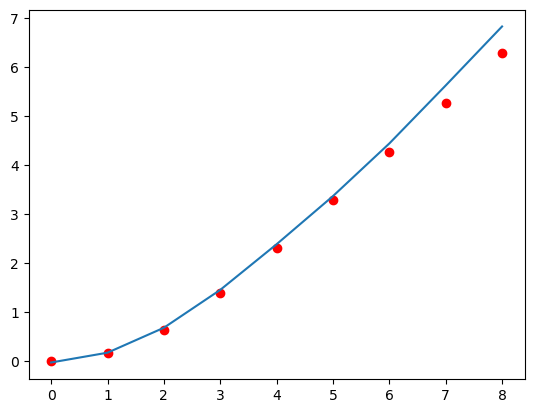

In [75]:
y_pred = model(x_train)
MAE=torch.abs(y_train-y_pred).mean()
print('Mean Absolute Error',MAE.item())
y_pred = y_pred.detach().numpy()
plt.plot(x_train.detach().numpy(), y_pred)
plt.scatter(x_train.detach().numpy(),y_train.detach().numpy(),c='red')
plt.show()


In [76]:
x=torch.linspace(0,10,100,requires_grad=True)
x=x.reshape(-1,1)

In [77]:
model=MyModule()


In [78]:
def dy_dx(y, x):
    return torch.autograd.grad(
        y, x, grad_outputs=torch.ones_like(y), create_graph=True,allow_unused=True
    )[0]


In [79]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)


In [80]:
losses=[]
n_epochs=25000

for i in range(n_epochs):
    y=model(x)
    y_p = dy_dx(y, x)
    y_pp = dy_dx(y_p, x)
    y_ppp = dy_dx(y_pp, x)

    residential = y_ppp+0.5*y*y_pp
    initial1 = y[0] - 0
    initial2 = y_p[0] - 0
    initial3 = y_p[-1]-.99

    loss = 10*initial3**2+1000*(residential**2).mean() + initial1**2 + initial2**2
    if loss.item() < 0.010:
        break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.detach().numpy())

    if i % 1000 == 0:
        print('Epoch=',i,' ,Loss=',loss.detach().numpy()[0])



Epoch= 0  ,Loss= 1065.1013
Epoch= 1000  ,Loss= 2.4234016
Epoch= 2000  ,Loss= 0.24452607
Epoch= 3000  ,Loss= 0.019573541


In [81]:
print(y_p[-1])


tensor([0.98955178260803222656], grad_fn=<SelectBackward0>)


In [82]:
def eval_residual(x):
    y=model(x)
    y_p = dy_dx(y, x)
    y_pp = dy_dx(y_p, x)
    y_ppp = dy_dx(y_pp, x)

    print('y_pp(0)=',y_pp[0].item())
    # modify the equation to match the one you sent
    residential = y_ppp+0.5*y*y_pp
    initial1 = y[0] - 1
    initial2 = y_p[0] - 0
    initial3 = y_p[-1]-.990
    return (residential**2).mean() + initial1 + initial2+ initial3
res=eval_residual(x)
y_pred=model(x)

print('Mean Residual=',res.item())


y_pp(0)= 0.3334425687789917
Mean Residual= -0.9504938721656799


Mean Absolute Error Between Dr Parand results and the presented model: 0.06661967188119888


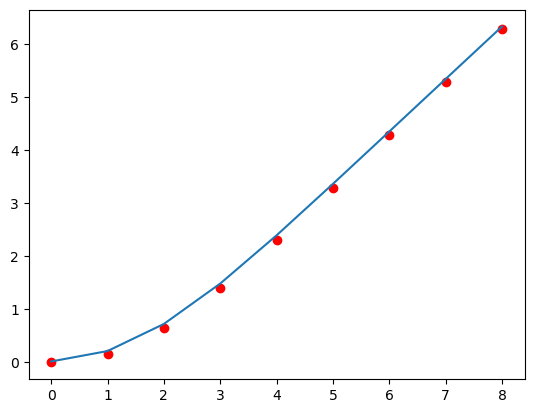

In [83]:
x= torch.tensor([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], dtype=torch.float, requires_grad=True)
x=x.reshape(-1,1)
y_pred = model(x)
MAE=torch.abs(y_train-y_pred).mean()
print('Mean Absolute Error Between Dr Parand results and the presented model:',MAE.item())
y_pred = y_pred.detach().numpy()
plt.plot(x_train.detach().numpy(), y_pred)
plt.scatter(x_train.detach().numpy(),y_train.detach().numpy(),c='red')
plt.show()


In [84]:
def calculate_y_and_ypp(model, x_values, x_for_ypp):
    """
    Calculate y values for specific x_values and y'' at a single point x_for_ypp.

    Args:
    - model: The trained PyTorch model.
    - x_values: A tensor of x values where y needs to be calculated.
    - x_for_ypp: A single float value where y'' needs to be calculated.

    Returns:
    - y_values: A tensor of y values at x_values.
    - ypp_at_point: The value of y'' at x_for_ypp.
    """
    # Ensure x_values and x_for_ypp are tensors
    x_values = x_values.reshape(-1, 1)  # Reshape for model input
    x_for_ypp = torch.tensor([x_for_ypp], dtype=torch.float, requires_grad=True).reshape(-1, 1)

    # Calculate y values for x_values
    y_values = model(x_values).detach().numpy()  # Detach for no gradient computation

    # Calculate y'' at x_for_ypp
    y_at_point = model(x_for_ypp)
    y_prime_at_point = torch.autograd.grad(
        y_at_point, x_for_ypp, grad_outputs=torch.ones_like(y_at_point), create_graph=True
    )[0]
    y_double_prime_at_point = torch.autograd.grad(
        y_prime_at_point, x_for_ypp, grad_outputs=torch.ones_like(y_prime_at_point), create_graph=True
    )[0]

    return y_values, y_double_prime_at_point.item()

# Define x values where you want y to be calculated
x_values = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype=torch.float)

# Define the point where you want y'' to be calculated
x_for_ypp = 0.0

# Call the function
y_values, ypp_at_0 = calculate_y_and_ypp(model, x_values, x_for_ypp)

# Print results
print("y values at x =", x_values.tolist(), ":", y_values)
print("y'' at x = 0:", ypp_at_0)


def calculate_y_yprime_ypp(model, x_values):
    """
    Calculate y, y', and y'' for each x in x_values.

    Args:
    - model: The trained PyTorch model.
    - x_values: A tensor of x values where y, y', y'' need to be calculated.

    Returns:
    - y_values: A list of y values at x_values.
    - y_prime_values: A list of y' values at x_values.
    - y_double_prime_values: A list of y'' values at x_values.
    """
    y_values = []
    y_prime_values = []
    y_double_prime_values = []
    
    for x in x_values:
        # Ensure x requires gradient for derivative computation
        x_tensor = torch.tensor([x], dtype=torch.float, requires_grad=True).reshape(-1, 1)
        
        # Forward pass to compute y
        y = model(x_tensor)
        y_values.append(y.detach().item())
        
        # Compute first derivative y'
        y_prime = torch.autograd.grad(
            y, x_tensor, grad_outputs=torch.ones_like(y), create_graph=True
        )[0]
        y_prime_values.append(y_prime.detach().item())
        
        # Compute second derivative y''
        y_double_prime = torch.autograd.grad(
            y_prime, x_tensor, grad_outputs=torch.ones_like(y_prime), create_graph=True
        )[0]
        y_double_prime_values.append(y_double_prime.detach().item())
    
    return y_values, y_prime_values, y_double_prime_values

# Example usage:

# Assume 'model' is your pre-trained PyTorch model
# Define x values where you want y, y', and y'' to be calculated
x_values = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype=torch.float)

# Call the function
y_values, y_prime_values, y_double_prime_values = calculate_y_yprime_ypp(model, x_values)

# Print results
print("x values:", x_values.tolist())
print("y values:", y_values)
print("y' values:", y_prime_values)
print("y'' values:", y_double_prime_values)


y values at x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] : [[0.01888537]
 [0.2153362 ]
 [0.7257899 ]
 [1.4873288 ]
 [2.3964057 ]
 [3.3661616 ]
 [4.353509  ]
 [5.343279  ]
 [6.3323793 ]
 [7.3214173 ]]
y'' at x = 0: 0.33344265818595886
x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
y values: [0.018885433673858643, 0.21533632278442383, 0.7257886528968811, 1.4873285293579102, 2.3964056968688965, 3.366161823272705, 4.353508949279785, 5.343278884887695, 6.3323798179626465, 7.321417331695557]
y' values: [0.031060341745615005, 0.35958215594291687, 0.6509842276573181, 0.8533542156219482, 0.9499799013137817, 0.9827354550361633, 0.9896922707557678, 0.9894582629203796, 0.9889048337936401, 0.9892900586128235]
y'' values: [0.33344265818595886, 0.3183445334434509, 0.2558347284793854, 0.14525265991687775, 0.05656828358769417, 0.015346421860158443, 0.0015032319352030754, -0.0009260177612304688, -2.408679574728012e-05, 0.0005924482829868793]
